In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set random seed
SEED = 321
np.random.seed(SEED)

In [2]:
df = pd.read_csv("City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month - City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
display(df.head(4))
df.info()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


In [3]:
## filter out top 4 largest cities
df = df.sort_values('SizeRank').head(4)
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [4]:
#df_ts = df.loc[pd.IndexSlice[0:3],:]
#df_ts

In [5]:
## Customization Options
# plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)

In [6]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major 
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax


In [7]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [8]:
melted = pd.melt(df,id_vars=['RegionID', 'SizeRank','RegionName', 'RegionType', 'StateName', 'State', 'Metro', 'CountyName'], value_name='typical home value' , var_name = 'Date' )
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,typical home value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [9]:
# melted = pd.melt(df.drop(columns=['RegionType','StateName', 'RegionID', 'Metro', 'CountyName']),
                # id_vars=['SizeRank', 'RegionName', 'State'],
                #value_name='Confirmed',var_name="Date")
#melted

In [10]:
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   RegionID            1092 non-null   int64         
 1   SizeRank            1092 non-null   int64         
 2   RegionName          1092 non-null   object        
 3   RegionType          1092 non-null   object        
 4   StateName           1092 non-null   object        
 5   State               1092 non-null   object        
 6   Metro               1092 non-null   object        
 7   CountyName          1092 non-null   object        
 8   Date                1092 non-null   datetime64[ns]
 9   typical home value  1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


In [11]:
melted = melted.set_index("Date")
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,typical home value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


In [12]:
## There are 199 unique countries included
melted['RegionName'].nunique()

4

In [13]:
df = melted.groupby('RegionName').resample("MS").sum()
df

/var/folders/8t/tynklgjn6gv85smzddzdzfbw0000gn/T/ipykernel_77741/379554797.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = melted.groupby('RegionName').resample("MS").sum()


RegionID  SizeRank  typical home value
RegionName Date                                              
Chicago    2000-01-01     17426         3            166139.0
           2000-02-01     17426         3            166536.0
           2000-03-01     17426         3            167368.0
           2000-04-01     17426         3            168826.0
           2000-05-01     17426         3            170499.0
...                         ...       ...                 ...
New York   2022-05-01      6181         0            768797.0
           2022-06-01      6181         0            773944.0
           2022-07-01      6181         0            777692.0
           2022-08-01      6181         0            779960.0
           2022-09-01      6181         0            781622.0

[1092 rows x 3 columns]

In [14]:
#df.loc[pd.IndexSlice['New York':'Houston'],:]

In [15]:
# cities = ['New York','Chicago','Los Angeles', 'Houston']
#plot_df = df.loc[cities].copy()
#plot_df

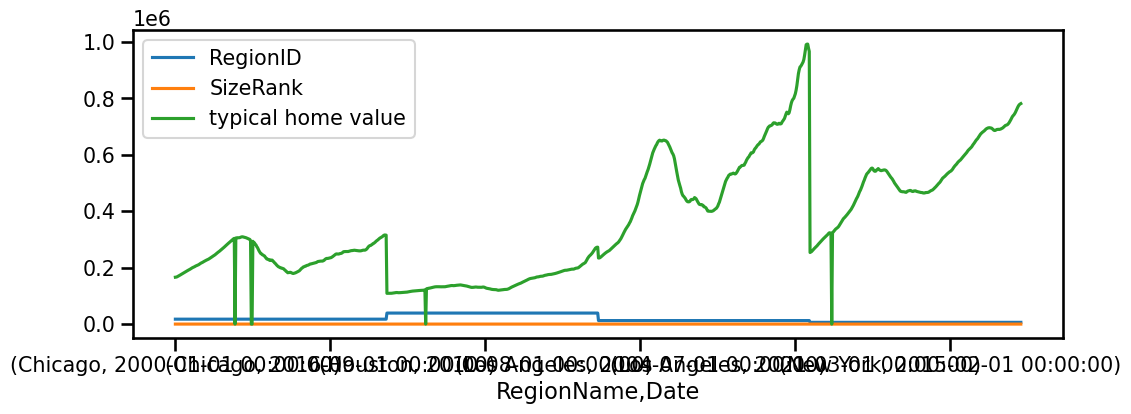

In [16]:
df.plot(figsize=(12,4));

In [17]:
# plot_df.index.get_level_values(0)

In [18]:
# level 1 is Date
#plot_df.index.get_level_values(1)

In [19]:
unstacked = df.unstack(level=0)
unstacked

RegionID                              SizeRank                      \
RegionName  Chicago Houston Los Angeles New York  Chicago Houston Los Angeles   
Date                                                                            
2000-01-01    17426   39051       12447     6181        3       2           1   
2000-02-01    17426   39051       12447     6181        3       2           1   
2000-03-01    17426   39051       12447     6181        3       2           1   
2000-04-01    17426   39051       12447     6181        3       2           1   
2000-05-01    17426   39051       12447     6181        3       2           1   
...             ...     ...         ...      ...      ...     ...         ...   
2022-05-01    17426   39051       12447     6181        3       2           1   
2022-06-01    17426   39051       12447     6181        3       2           1   
2022-07-01    17426   39051       12447     6181        3       2           1   
2022-08-01    17426   39051       12447     6181        3       2           1   
2022-09-01    17426   39051       12447     6181        3       2           1   

                    typical home value                                  
RegionName New York            Chicago   Houston Los Angeles  New York  
Date                                                                    
2000-01-01        0           166139.0  109068.0    234181.0  253690.0  
2000-02-01        0           166536.0  109079.0    234401.0  255517.0  
2000-03-01        0           167368.0  108878.0    235513.0  257207.0  
2000-04-01        0           168826.0  108881.0    237589.0  260310.0  
2000-05-01        0           170499.0  108834.0    240113.0  263204.0  
...             ...                ...       ...         ...       ...  
2022-05-01        0           312487.0  265558.0    990391.0  768797.0  
2022-06-01        0           314663.0  268901.0    992337.0  773944.0  
2022-07-01        0           315910.0  271059.0    992630.0  777692.0  
2022-08-01        0           315587.0  272400.0    978196.0  779960.0  
2022-09-01        0           315429.0  272639.0    966595.0  781622.0  

[273 rows x 12 columns]

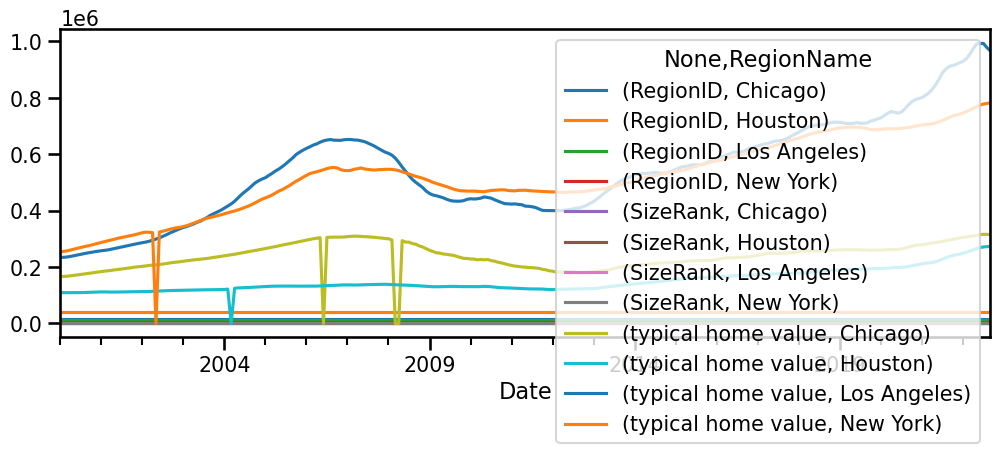

In [20]:
ax = unstacked.plot()

In [21]:
df2= df.unstack(level= 0)['typical home value']

<Axes: xlabel='Date'>

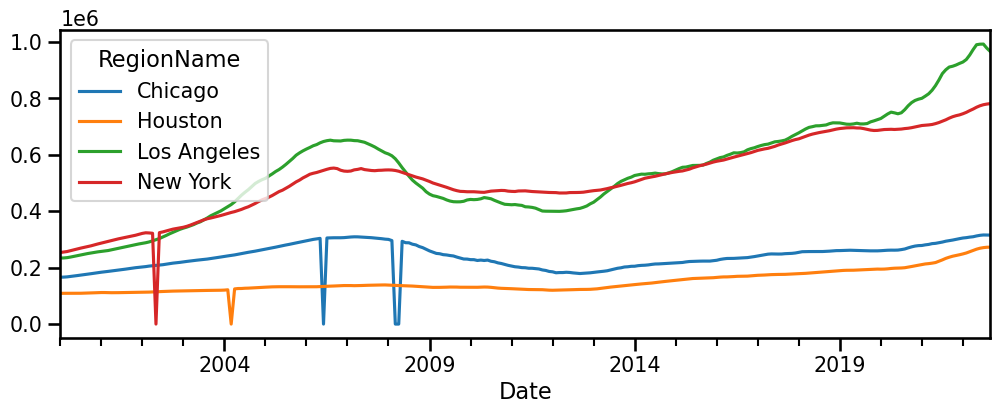

In [22]:
df2.plot()

In [23]:
# Using unstacked
df2.loc['12/2008'].idxmax(axis=1)

Date
2008-12-01    New York
Freq: MS, dtype: object

In [24]:
df2.loc['12/2008'].idxmin(axis=1)

Date
2008-12-01    Houston
Freq: MS, dtype: object

In [25]:
df2.diff().loc['12/2008']

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-12-01,-5753.0,-964.0,-12611.0,-4458.0
